In [106]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, confusion_matrix
from sklearn.decomposition import PCA


In [107]:
data = pd.read_csv('/home/vivekup3424/Documents/Projects/python_projects/Games-for-MLP-Training/web_app/game_log.csv')
data = data.drop(columns='closest_body_distance')
# Clean up the last column by removing quotes and converting everything to uppercase
data.iloc[:, -1] = data.iloc[:, -1].apply(lambda x: str(x).replace("'", "").upper())
data

,head_x,head_y,tail_x,tail_y,food_x,food_y,direction,snake_length,score,head_top_distance,...,body_turns,moves_since_eating,total_moves,enclosed_spaces_count,largest_enclosed_space,tail_reachable,food_eaten,game_ended,time_elapsed,action
0,16,10,15,10,6,19,1,2,1,10,...,0,45,45,0,0,True,False,False,4.692,UP
1,16,7,16,8,6,19,1,2,1,7,...,0,48,48,0,0,True,False,False,4.970,UP
2,16,3,16,4,6,19,1,2,1,3,...,0,52,52,0,0,True,False,False,5.363,UP
3,16,0,16,1,6,19,1,2,1,0,...,0,55,55,0,0,True,False,False,5.667,UP
4,16,15,16,16,6,19,4,2,1,15,...,0,80,80,0,0,True,False,False,8.108,RIGHT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8279,6,13,9,3,5,16,3,44,43,13,...,5,2362,2362,0,0,True,False,False,241.287,LEFT
8280,2,13,13,3,5,16,1,44,43,13,...,6,2366,2366,0,0,True,False,False,241.665,UP
8281,2,8,16,5,5,16,3,44,43,8,...,6,2371,2371,0,0,True,False,False,242.127,LEFT
8282,0,8,16,7,5,16,1,44,43,8,...,6,2373,2373,0,0,True,False,False,242.327,UP


In [108]:
one_hot_encoder = OneHotEncoder(sparse_output=False)
action_encoded = one_hot_encoder.fit_transform(data[['action']])
action_columns = one_hot_encoder.get_feature_names_out(['action'])
action_encoded_df = pd.DataFrame(action_encoded, columns=action_columns)
action_encoded_df

,action_DOWN,action_LEFT,action_RIGHT,action_UP
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
8279,0.0,1.0,0.0,0.0
8280,0.0,0.0,0.0,1.0
8281,0.0,1.0,0.0,0.0
8282,0.0,0.0,0.0,1.0


In [109]:
data = pd.concat([data.drop(columns=['action']), action_encoded_df], axis=1)

In [110]:
data = data.loc[:, data.nunique() > 1]

In [111]:
X = data.drop(columns=action_columns)  # Features without the one-hot encoded 'action' columns
y = data[action_columns]  # The target is the one-hot encoded 'action' columns
y

,action_DOWN,action_LEFT,action_RIGHT,action_UP
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
8279,0.0,1.0,0.0,0.0
8280,0.0,0.0,0.0,1.0
8281,0.0,1.0,0.0,0.0
8282,0.0,0.0,0.0,1.0


In [112]:
first_rows = np.array(X.iloc[0])
categorical_cols = []

# Identify numeric columns
numeric_cols = []

for i in range(len(first_rows)-1):
    if(type(first_rows[i]) == str or type(first_rows[i])== np.bool_):
        print(type(first_rows[i]))
        categorical_cols.append(i)
    else:
        numeric_cols.append(i)

categorical_cols
for i in categorical_cols:
    print(first_rows[i])



<class 'numpy.bool_'>
<class 'numpy.bool_'>
<class 'numpy.bool_'>
<class 'numpy.bool_'>
<class 'numpy.bool_'>
<class 'numpy.bool_'>
<class 'numpy.bool_'>
<class 'numpy.bool_'>
False
False
True
False
False
True
True
False


In [113]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df

,head_x,head_y,tail_x,tail_y,food_x,food_y,direction,snake_length,score,head_top_distance,...,food_above,food_below,food_left,food_right,body_segments_same_row,body_segments_same_column,body_turns,moves_since_eating,total_moves,time_elapsed
0,0.842105,0.526316,0.789474,0.526316,0.315789,1.000000,0.000000,0.012987,0.012987,0.526316,...,0.0,1.0,1.0,0.0,0.052632,0.000000,0.000000,0.012600,0.012600,0.012656
1,0.842105,0.368421,0.842105,0.421053,0.315789,1.000000,0.000000,0.012987,0.012987,0.368421,...,0.0,1.0,1.0,0.0,0.000000,0.052632,0.000000,0.013522,0.013522,0.013491
2,0.842105,0.157895,0.842105,0.210526,0.315789,1.000000,0.000000,0.012987,0.012987,0.157895,...,0.0,1.0,1.0,0.0,0.000000,0.052632,0.000000,0.014751,0.014751,0.014671
3,0.842105,0.000000,0.842105,0.052632,0.315789,1.000000,0.000000,0.012987,0.012987,0.000000,...,0.0,1.0,1.0,0.0,0.000000,0.052632,0.000000,0.015673,0.015673,0.015583
4,0.842105,0.789474,0.842105,0.842105,0.315789,1.000000,1.000000,0.012987,0.012987,0.789474,...,0.0,1.0,1.0,0.0,0.000000,0.052632,0.000000,0.023356,0.023356,0.022913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8279,0.315789,0.684211,0.473684,0.157895,0.263158,0.842105,0.666667,0.558442,0.558442,0.684211,...,0.0,1.0,1.0,0.0,0.052632,0.263158,0.416667,0.724647,0.724647,0.723047
8280,0.105263,0.684211,0.684211,0.157895,0.263158,0.842105,0.000000,0.558442,0.558442,0.684211,...,0.0,1.0,0.0,1.0,0.263158,0.000000,0.500000,0.725876,0.725876,0.724182
8281,0.105263,0.421053,0.842105,0.263158,0.263158,0.842105,0.666667,0.558442,0.558442,0.421053,...,0.0,1.0,0.0,1.0,0.052632,0.263158,0.500000,0.727412,0.727412,0.725569
8282,0.000000,0.421053,0.842105,0.368421,0.263158,0.842105,0.000000,0.558442,0.558442,0.421053,...,0.0,1.0,0.0,1.0,0.157895,0.000000,0.500000,0.728027,0.728027,0.726169


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

In [115]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
y_test

(6627, 33)
(1657, 33)
(6627, 4)
(1657, 4)


,action_DOWN,action_LEFT,action_RIGHT,action_UP
6071,0.0,0.0,1.0,0.0
789,1.0,0.0,0.0,0.0
4331,0.0,0.0,0.0,1.0
2057,0.0,0.0,0.0,1.0
7177,1.0,0.0,0.0,0.0
...,...,...,...,...
6766,0.0,0.0,1.0,0.0
2020,0.0,1.0,0.0,0.0
4074,0.0,0.0,1.0,0.0
7175,0.0,0.0,0.0,1.0


In [116]:
# Define the neural network model
model = Sequential([
    Dense(5, activation='relu',input_dim = X_train.shape[1]),
    Dense(5, activation='relu'),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=130, validation_split=0.1)

Epoch 1/20


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2541 - loss: 1.5138 - val_accuracy: 0.4027 - val_loss: 1.3390
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3935 - loss: 1.3277 - val_accuracy: 0.5264 - val_loss: 1.1951
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5330 - loss: 1.1788 - val_accuracy: 0.5686 - val_loss: 1.0385
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5498 - loss: 1.0431 - val_accuracy: 0.5897 - val_loss: 0.9138
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5697 - loss: 0.9259 - val_accuracy: 0.6712 - val_loss: 0.8095
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6419 - loss: 0.8172 - val_accuracy: 0.7089 - val_loss: 0.7232
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6637 - loss: 0.7384 - val_accuracy: 0.7149 - val_loss: 0.6561
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6806 - loss: 0.6764 - val_accuracy: 0.7662 - val_loss: 0.6065
Epo

In [117]:
y_train

,action_DOWN,action_LEFT,action_RIGHT,action_UP
6508,0.0,0.0,1.0,0.0
286,1.0,0.0,0.0,0.0
550,0.0,1.0,0.0,0.0
5241,0.0,0.0,0.0,1.0
3773,0.0,1.0,0.0,0.0
...,...,...,...,...
5734,0.0,1.0,0.0,0.0
5191,0.0,0.0,0.0,1.0
5390,0.0,0.0,0.0,1.0
860,0.0,0.0,1.0,0.0


In [118]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test.values, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted', zero_division=1)
recall = recall_score(y_test_classes, y_pred_classes, average='weighted', zero_division=1)
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted', zero_division=1)

# Ensure there are no NaNs
if np.isnan(y_test.values).any() or np.isnan(y_pred).any():
    raise ValueError("Input contains NaN.")

# Calculate R² score
r2 = r2_score(y_test.values, y_pred, multioutput='uniform_average')

# Print metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'R² Score: {r2:.2f}')

# Print detailed classification report
print("Performance Metrics:")
print(classification_report(y_test_classes, y_pred_classes, target_names=['DOWN', 'LEFT', 'RIGHT', 'UP']))



52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1-Score: 0.90
R² Score: 0.78
Performance Metrics:
              precision    recall  f1-score   support

        DOWN       0.85      0.89      0.87       409
        LEFT       0.91      0.91      0.91       431
       RIGHT       0.94      0.93      0.94       423
          UP       0.90      0.87      0.89       394

    accuracy                           0.90      1657
   macro avg       0.90      0.90      0.90      1657
weighted avg       0.90      0.90      0.90      1657



In [119]:
y_train

,action_DOWN,action_LEFT,action_RIGHT,action_UP
6508,0.0,0.0,1.0,0.0
286,1.0,0.0,0.0,0.0
550,0.0,1.0,0.0,0.0
5241,0.0,0.0,0.0,1.0
3773,0.0,1.0,0.0,0.0
...,...,...,...,...
5734,0.0,1.0,0.0,0.0
5191,0.0,0.0,0.0,1.0
5390,0.0,0.0,0.0,1.0
860,0.0,0.0,1.0,0.0


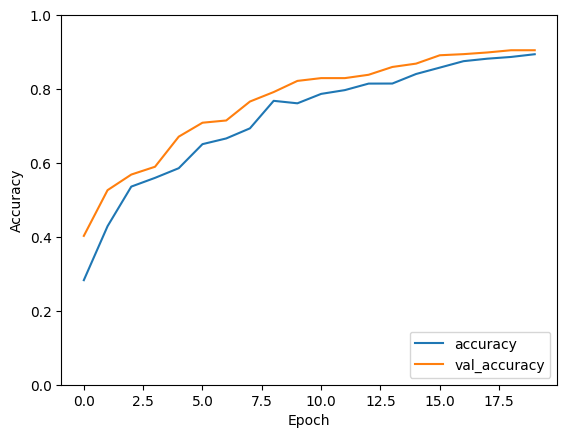

In [120]:
# Plot training history if needed
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()